In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow import keras
### hack tf-keras to appear as top level keras
import sys
sys.modules['keras'] = keras
### end of hack

import keras.backend as K
from keras.utils import multi_gpu_model
from keras.callbacks import TensorBoard
from sklearn import svm

from sklearn.model_selection import KFold

import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from keras.callbacks import *
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
import pprint
import os
from os import listdir
from os.path import isfile, join
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Importing custom framework
import sys, os
sys.path.insert(0, os.path.abspath('../..'))
from data_split import prepare_data_spectrogram

In [23]:
spectrogramPath = '../../merged/spectrogram.hdf5'
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data_spectrogram(spectrogramPath, True)

6000

<h2>Experiment 1 </h2>

In [3]:
clf = svm.SVC(decision_function_shape='ovr')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))


0.9967777777777778
0.9558333333333333


In [4]:
print(clf.score(X_test, y_test))
confusion_matrix(y_test, clf.predict(X_test))

0.9513333333333334


array([[561,   0,  11,   0,   1,   0,   0,  23,   4,   0],
       [  0, 509,   0,   0,   1,   3,   0,   1,   0,  86],
       [ 11,   0, 576,   0,  10,   0,   0,   1,   2,   0],
       [  0,   0,   3, 570,   0,   4,   0,   2,  20,   1],
       [  1,   3,   0,   0, 592,   2,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0, 597,   2,   0,   0,   1],
       [  0,   0,   1,   8,   0,  26, 538,   2,  25,   0],
       [  0,   0,   1,   0,   1,   3,   0, 583,   0,  12],
       [  0,   0,   0,   7,   0,   0,   1,   0, 592,   0],
       [  0,   1,   0,   0,   0,   5,   0,   2,   2, 590]])

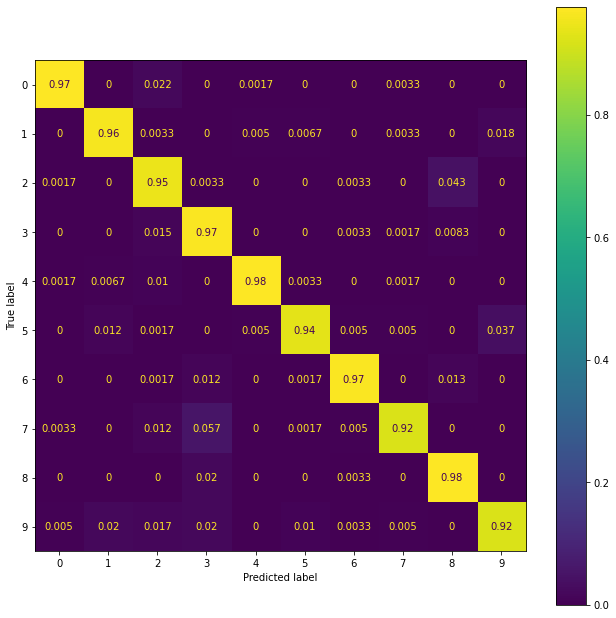

In [8]:
fig, ax = plt.subplots(figsize=(11, 11))
plot_confusion_matrix(clf, X_val, y_val, normalize='true', ax=ax)

<h2>Experiment 2</h2>

In [9]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))

1.0
0.9213333333333333


In [10]:
print(clf.score(X_test, y_test))
confusion_matrix(y_test, clf.predict(X_test))

0.9255


array([[535,   1,  21,   1,   1,   0,   0,  38,   3,   0],
       [  0, 522,   0,   0,   1,   3,   0,   1,   0,  73],
       [ 19,   0, 537,   6,  22,   0,   4,   0,  12,   0],
       [  1,   2,   1, 551,   0,   1,   6,   4,  32,   2],
       [  0,   0,   1,   0, 588,   6,   0,   5,   0,   0],
       [  0,   1,   0,   0,   3, 591,   3,   0,   0,   2],
       [  0,   0,   0,   2,   0,  25, 547,   0,  26,   0],
       [  2,   0,   1,   0,   1,   3,   1, 569,   0,  23],
       [  0,   0,   0,  38,   0,   0,   6,   0, 556,   0],
       [  1,   9,   1,   1,   4,  20,   0,   6,   1, 557]])

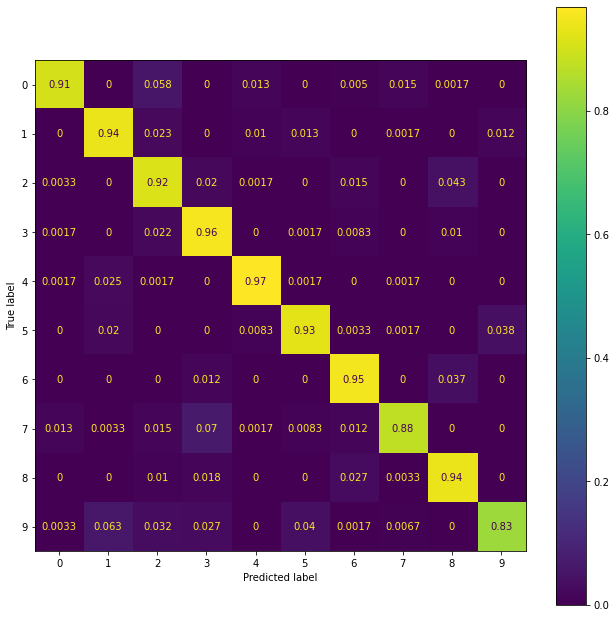

In [11]:
fig, ax = plt.subplots(figsize=(11, 11))
plot_confusion_matrix(clf, X_val, y_val, normalize='true', ax=ax)

# Experiment 3

In [3]:
clf_sig = svm.SVC(kernel='sigmoid', decision_function_shape='ovr')
clf_sig.fit(X_train, y_train)
print(clf_sig.score(X_train, y_train))
print(clf_sig.score(X_val, y_val))

0.08633333333333333
0.07383333333333333


In [4]:
print(clf_sig.score(X_test, y_test))
confusion_matrix(y_test, clf_sig.predict(X_test))

0.07416666666666667


array([[  0,   0,  55,   0,   0, 545,   0,   0,   0,   0],
       [  0,   0,   5,   0,   0, 595,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 600,   0,   0,   0,   0],
       [  0,   0,  19,   0,   0, 581,   0,   0,   0,   0],
       [  0,   0,  21,   0,   0, 579,   0,   0,   0,   0],
       [  0,   0, 155,   0,   0, 445,   0,   0,   0,   0],
       [  0,   0,  75,   0,   0, 525,   0,   0,   0,   0],
       [  0,   0,  92,   0,   0, 508,   0,   0,   0,   0],
       [  0,   0,   9,   0,   0, 591,   0,   0,   0,   0],
       [  0,   0,  59,   0,   0, 541,   0,   0,   0,   0]])

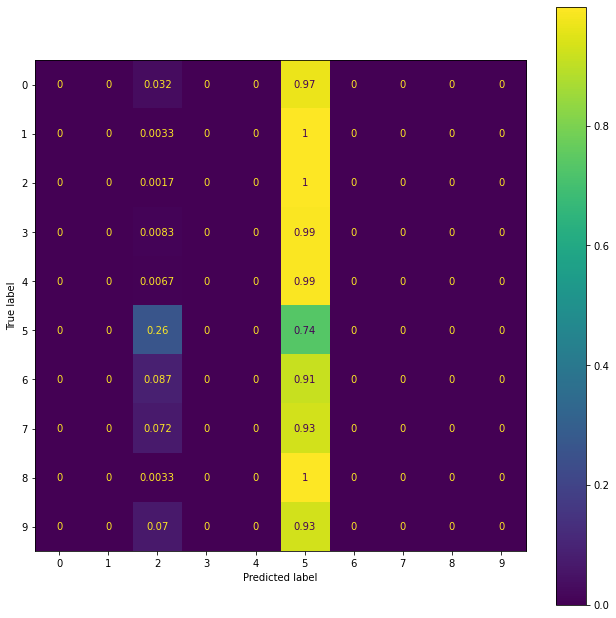

In [5]:
fig, ax = plt.subplots(figsize=(11, 11))
plot_confusion_matrix(clf_sig, X_val, y_val, normalize='true', ax=ax)

In [3]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(18000, 51529)
(6000, 51529)
(6000, 51529)
